# Aggregation of Sociopatterns data with variable temporal resolution

In [1]:
import networkx as nx
import string
import json
import numpy as np
from time import time

%matplotlib inline 
import matplotlib.pyplot as plt

from simplex_utils import *

In [2]:
datasetlist = ['InVS13','InVS15','LH10','LyonSchool','SFHH','Thiers13']

n_minutes = 30
delta_t = 20*3*n_minutes   
step = 0.1

# Weighting of all the maximal facets 

/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


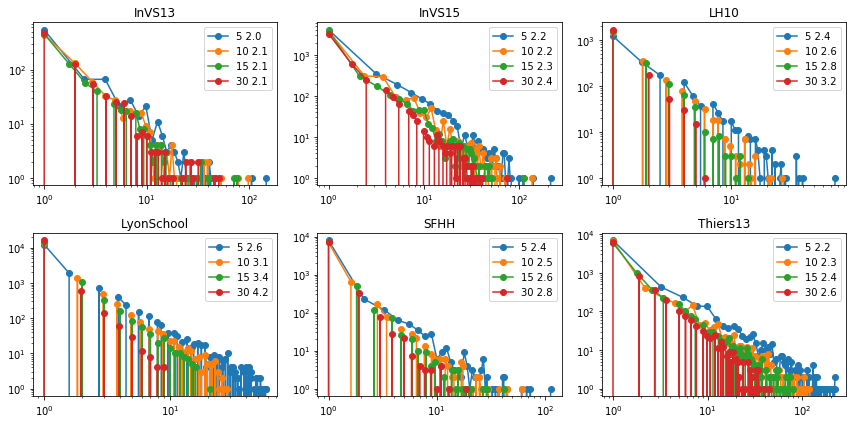

In [3]:
dataset_dir = 'Originaldata_20s/' 

fig = plt.figure(figsize=(12,6))
for i, dataset in enumerate(datasetlist):
    for nm in [5,10,15,30]:
        aggs = extract_networks(dataset_dir,dataset,nm, original_nets=False);
        cliques = extract_cliques(aggs)
        ws = clique_weights(cliques);
        aa, bb = np.histogram(ws.values(), 100)
        plt.subplot(2,3,i+1)
        plt.loglog(bb[:-1],aa,'o-',label=str(nm)+' '+str(round(average_clique_size(ws),1)))
        plt.title(dataset)
        plt.legend()
plt.tight_layout()

In [4]:
!mkdir ./cliques_data

mkdir: ./cliques_data: File exists


In [ ]:
dataset_dir = 'Originaldata_20s/' 

for i, dataset in enumerate(datasetlist):
    for nm in [5,10,15,30]:
        aggs = extract_networks(dataset_dir,dataset,nm, original_nets=False);
        cliques = extract_cliques(aggs)
        ws = clique_weights(cliques);
        maximal_cliques = clean_non_maximal(ws);
        save_cliques(maximal_cliques,'./cliques_data/',dataset,nm,thr=5)

## Reweighting of all the simplices
(including the non-maximal ones)

In [6]:
!mkdir ./cliques_data_reduced

mkdir: ./cliques_data_reduced: File exists


In [7]:
rwm = {}

InVS13
InVS15
LH10
LyonSchool
SFHH
Thiers13


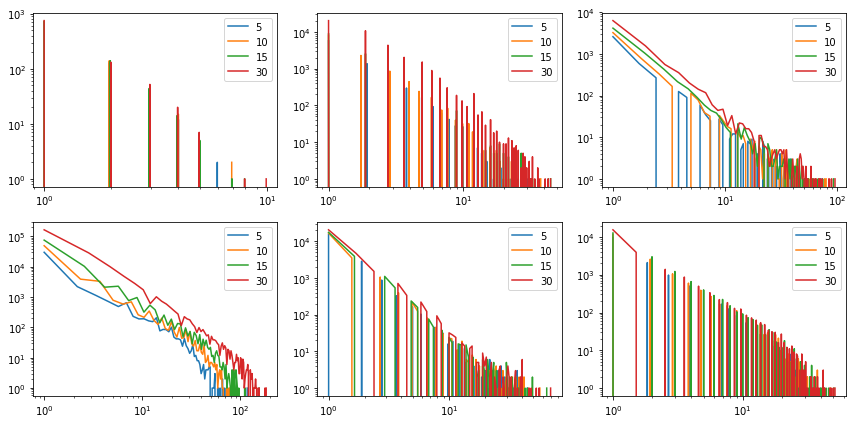

In [10]:
fig = plt.figure(figsize=(12,6))
for i, dataset in enumerate(datasetlist):
    rwm[dataset] = {}
    plt.subplot(2,3,i+1)
    print dataset
    for nm in [5,10,15,30]:
        aggs = extract_networks(dataset_dir,dataset,nm, original_nets=False);
        cliques = extract_cliques(aggs)
        ws = clique_weights(cliques);
        rwm[dataset][nm] = reweighting_all_cliques(ws); #creates the whole set of cliques with the right weights
        aa, bb = np.histogram(rwm[dataset][nm].values(), bins=100)
        plt.loglog(bb[:-1],aa, label=str(nm));
        save_cliques(rwm[dataset][nm],'./cliques_data_reduced/',dataset,nm,thr=None)
    plt.legend()
        
plt.tight_layout()

In [12]:
thrs = [0.95, 0.9, 0.85, 0.8]
thr_dir = 'thr_data/'

In [15]:
!mkdir thr_data

In [21]:
actual_maximal = {}
# here you can use this to extract the cliques you want for the density you prefer... 
for i, dataset in enumerate(datasetlist):
    print dataset
    actual_maximal[dataset] = {}
    for nm in [5,10,15,30]:
        actual_maximal[dataset][nm] = {};
        for thr in thrs:
            now = time()
            selected = limit_dimension(quantile_cut(rwm[dataset][nm],thr),3);
            new_rwm = dict(zip(selected, map(lambda x: rwm[dataset][nm][x], selected)));
            actual_maximal[dataset][nm][thr] = clean_non_maximal(new_rwm);
            save_cliques(actual_maximal[dataset][nm][thr],'./thr_data/',dataset,str(nm)+'_'+str(thr),thr=None)
            print nm, thr, time() - now;

InVS13
5 0.95 0.00452303886414
5 0.9 0.00843787193298
5 0.85 0.00934600830078
5 0.8 0.0086817741394
10 0.95 0.00371694564819
10 0.9 0.00803303718567
10 0.85 0.00715398788452
10 0.8 0.00582003593445
15 0.95 0.00178098678589
15 0.9 0.00579595565796
15 0.85 0.00585579872131
15 0.8 0.00609397888184
30 0.95 0.00281500816345
30 0.9 0.00778603553772
30 0.85 0.00701308250427
30 0.8 0.00691890716553
InVS15
5 0.95 0.0322780609131
5 0.9 0.188206911087
5 0.85 0.172721862793
5 0.8 0.788923978806
10 0.95 0.0852739810944
10 0.9 0.373358011246
10 0.85 0.366832971573
10 0.8 1.16507291794
15 0.95 0.112099885941
15 0.9 0.231006145477
15 0.85 0.525338888168
15 0.8 1.53745007515
30 0.95 0.180343151093
30 0.9 0.307835102081
30 0.85 0.519068956375
30 0.8 1.21313095093
LH10
5 0.95 0.0100688934326
5 0.9 0.038624048233
5 0.85 0.080482006073
5 0.8 0.245534896851
10 0.95 0.015585899353
10 0.9 0.0700080394745
10 0.85 0.154218912125
10 0.8 0.358749866486
15 0.95 0.0242488384247
15 0.9 0.0976800918579
15 0.85 0.1855

### LEGACY CODE by Alain

In [ ]:

# for dataset in datasetlist:
#     f = open(dataset_dir+'/tij_' + dataset +'.dat')
#     (t0,i,j) = map(int,string.split(f.readline()))
#     if dataset not in ['LyonSchool','LH10']:
#         t0 = t0*20
#     f.close()
#     print t0
#     # aggregation on scale of x minutes
#     for n_minutes in [5,15,30,60]:
#         delta_t = 20*3*n_minutes   
#         originalnetworks = {}
#         aggnetworks = {}
#         f = open('Originaldata_20s/tij_' + dataset +'.dat')
#         for line in f:
#             (t,i,j) = map(int,string.split(line))
#             if dataset not in ['LyonSchool','LH10']:
#                 t = t*20
#             if t not in originalnetworks:
#                 originalnetworks[t] = nx.Graph()
#             originalnetworks[t].add_edge(i,j)
#             aggtime = t0 + ((t-t0)/delta_t)*delta_t #this is a trick using the integer division in python
#           #  print t,aggtime
#             if aggtime not in aggnetworks:
#                 aggnetworks[aggtime] = nx.Graph()
#             aggnetworks[aggtime].add_edge(i,j)
#         f.close()

#         print dataset, n_minutes,'minutes',len(originalnetworks.keys()), len(aggnetworks.keys())
#         listsaggcliques = {}
#         for t in sorted(aggnetworks.keys()):
#             listsaggcliques[t] = list(nx.find_cliques(aggnetworks[t]))
            
#         jd = open('Aggr_'+str(n_minutes)+'min/cliques'+dataset+'.json','w')
#         json.dump(listsaggcliques,jd)
#         jd.close()
        
#         ps = {}
#         list_s = []
#         norm = 0.
#         for t in listsaggcliques:
#             for c in listsaggcliques[t]:
#                 norm +=1.
#                 s = len(c)
#                 list_s.append(s)
#                 if s not in ps:
#                     ps[s] = 0.
#                 ps[s] += 1
                
#         hw = open('Aggr_'+str(n_minutes)+'min/ps_cliques'+dataset+'.dat','w')
#         for s in sorted(ps.keys()):
#             hw.write('%s\t%s\t%s\n' % (s,ps[s],ps[s]/norm) )
#         hw.close()
#         s = np.average(list_s)
#         s2 = np.average([x**2 for x in list_s])
#         print 'sizes',s,s2,s2/s
        
#         activity = {}
#         for t in listsaggcliques:
#             for c in listsaggcliques[t]:
#                 for i in c:
#                     if i not in activity:
#                         activity[i] = 0
#                     activity[i] += 1./len(c)
#         for i in activity:
#             activity[i] = activity[i]/len(aggnetworks.keys())
#         pa = {}
#         norm = 0.
#         for i in activity:
#             norm +=1.
#             a = activity[i]/step
#             if a not in pa:
#                 pa[a] = 0.
#             pa[a] += 1
#         hw = open('Aggr_'+str(n_minutes)+'min/pa_'+dataset+'.dat','w')
#         for a in sorted(pa.keys()):
#             hw.write('%s\t%s\n' % (a*step,pa[a]/norm) )
#         hw.close()
#         a = np.average(activity.values())
#         a2 = np.average([x**2 for x in activity.values()])
#         print 'activities',a,a2,a2/a 
#         print 'ratio thresholds',ratiolambda(s,s2,a,a2)